# Proyek Analisis Data: E-Commerce

* Name : Rahmi Indah Safitri
* Email : rahmiindh23@gmail.com

## Menentukan Pertanyaan Bisnis

- Bagaimana performa produk berdasarkan jumlah order dan review score?
- Bagaimana performa penjualan dan revenue perusahaan?
- Kota manakah yang menyumbang revenue terbanyak?
- Bagaimana segmentasi pelanggan dinilai dari RFM score?

## Menyaipkan semua library yang dibuthkan

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Customers Dataset

In [180]:
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [181]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### Geolocation Dataset

In [182]:
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [183]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


#### Order Items Dataset

In [184]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [185]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### Order Payments Dataset

In [186]:
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [187]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


#### Order Reviews Dataset

In [188]:
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [189]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


#### Orders Dataset

In [190]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [191]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat kesalahan tipe data pada kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date`.

#### Products Dataset

In [192]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [193]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#### Product Category Name Translation

In [194]:
product_category_name_translation_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [195]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


#### Sellers Dataset

In [196]:
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [197]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### Assessing Data

#### Mengecek Missing Value

In [198]:
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [199]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [200]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [201]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [202]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Pada dataset ini terdapat banyak missing value, ini terdapat pada `review_comment_title` dan `review_comment_message`. Ini berarti cukup banyak customer yang tidak memberikan review terhadap sebuah produk.

In [203]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Pada dataset ini terdapat banyak missing value yaitu terdapat pada kolom `order_approved_at`, `order_delivered_carrier_date` dan `order_delivered_customer_date`. Hal ini menandakan bahwa order tersebut belum selesai (belum terkirim atau delivered).

In [204]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Pada dataset ini terdapat banyak missing value yaitu terdapat pada kolom `product_category_name`, `product_name_lenght`, `product_description_lenght` dan `product_photos_qty`. Hal ini menandakan banyak produk yang belum melengkapi deskripsi produknya.

In [205]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [206]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

### Cleaning Data

#### Fixing Data Type

In [207]:
datetime_columns = [
    "order_purchase_timestamp", 
    "order_approved_at", 
    "order_delivered_carrier_date", 
    "order_delivered_customer_date", 
    "order_estimated_delivery_date"
]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [208]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)

### Explore `orders_df`

In [209]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


### Explore `customers_df`

In [210]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa produk berdasarkan jumlah order dan review score?

In [211]:
products_df = products_df.merge(product_category_name_translation_df, on="product_category_name")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [212]:
order_items_df = order_items_df.merge(products_df, on="product_id")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [213]:
sum_order_items_df = order_items_df.groupby("product_category_name_english").order_id.nunique().sort_values(ascending=False).reset_index()
sum_order_items_df.rename(columns={
    "product_category_name_english": "product_category",
    "order_id": "order_count"
}, inplace=True)
sum_order_items_df.head(15)

,product_category,order_count
0,bed_bath_table,9417
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449
5,housewares,5884
6,watches_gifts,5624
7,telephony,4199
8,auto,3897
9,toys,3886


In [214]:
sum_order_items_df.to_csv("dashboard/sum_order_items.csv", index=False)

C:\Users\ACER\AppData\Local\Temp\ipykernel_6796\3271607481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_count", y="product_category", data=sum_order_items_df.head(5), palette=colors)


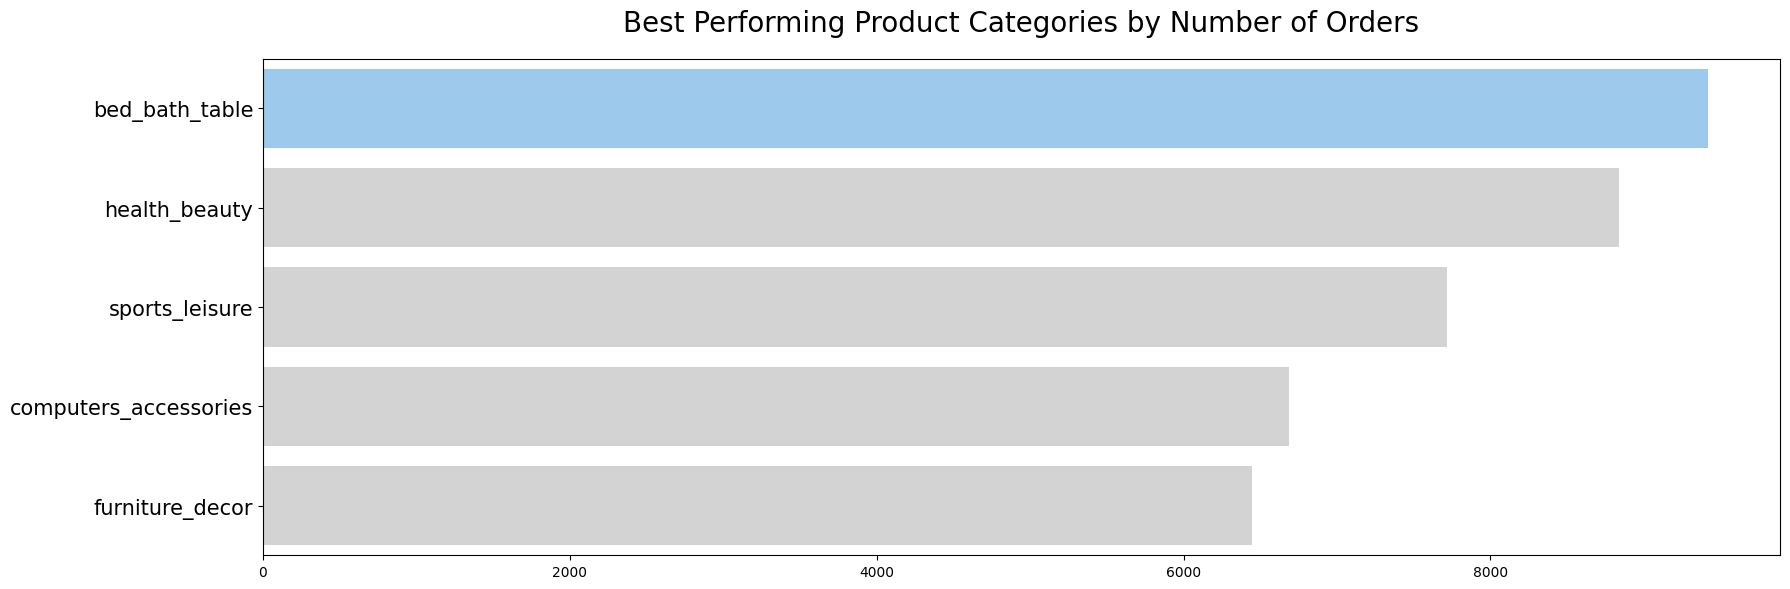

In [215]:
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(18, 6))
sns.barplot(x="order_count", y="product_category", data=sum_order_items_df.head(5), palette=colors)
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize=15)
plt.xticks(fontsize=10)
plt.title("Best Performing Product Categories by Number of Orders", loc="center", fontsize=20, pad=20)
plt.tight_layout()
# plt.savefig("images/best-performing-1.png")
plt.show()

Berdasarkan visualisasi data di atas, dapat disimpulkan bahwa **bed_bath_table** merupakan product categories yang paling banyak diorder.

C:\Users\ACER\AppData\Local\Temp\ipykernel_6796\3985757983.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_count", y="product_category", data=sum_order_items_df.sort_values(by="order_count", ascending=True).head(5), palette=colors)


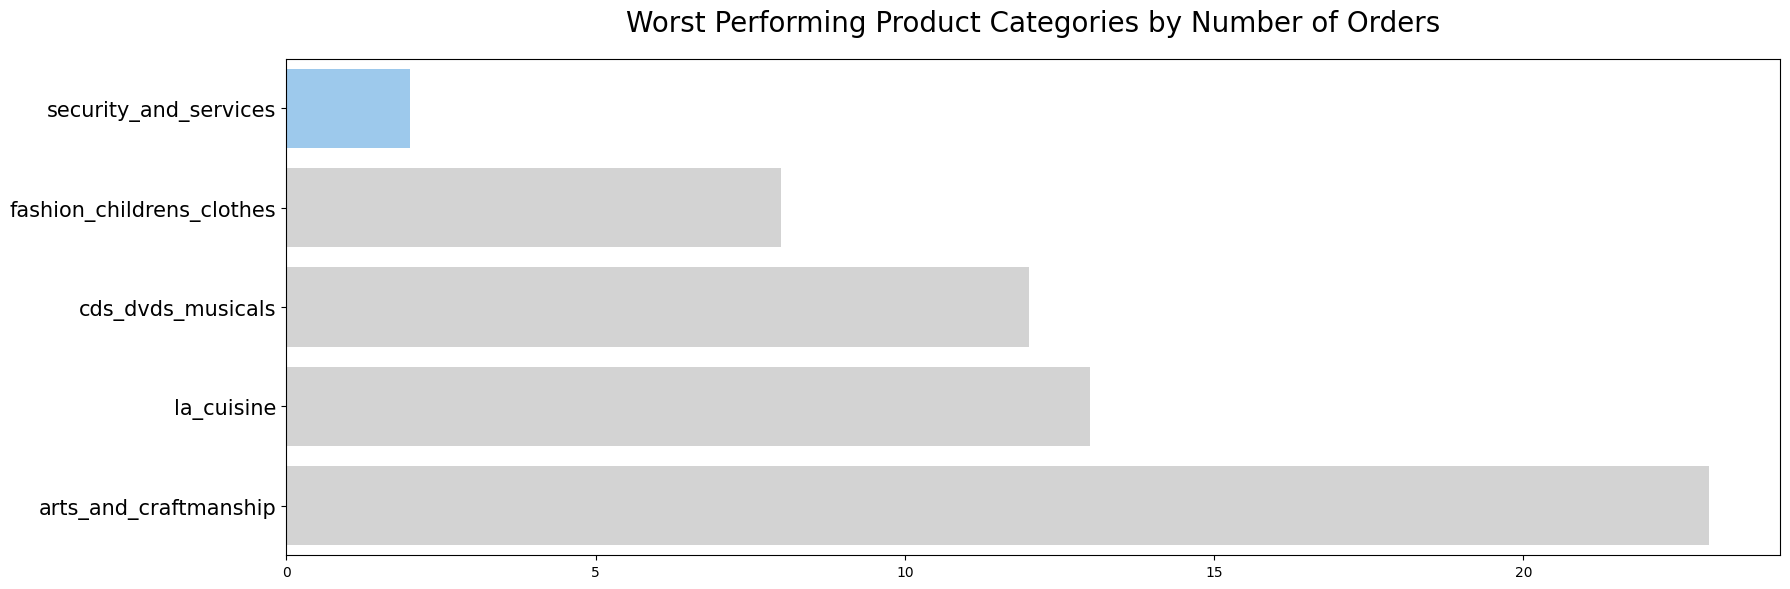

In [216]:
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(18, 6))
sns.barplot(x="order_count", y="product_category", data=sum_order_items_df.sort_values(by="order_count", ascending=True).head(5), palette=colors)
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize=15)
plt.xticks(fontsize=10)
plt.title("Worst Performing Product Categories by Number of Orders", loc="center", fontsize=20, pad=20)
plt.tight_layout()
# plt.savefig("images/worst-performing-1.png")
plt.show()

Berdasarkan visualisasi data di atas, dapat disimpulkan bahwa **security_and_services** merupakan product categories yang paling sedikit diorder

In [217]:
order_items_df = order_items_df.merge(order_reviews_df, on="order_id")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,50.0,30.0,40.0,pet_shop,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,33.0,13.0,33.0,furniture_decor,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,16.0,10.0,15.0,perfumery,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,35.0,40.0,30.0,garden_tools,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [218]:
mean_review_score_df = order_items_df.groupby("product_category_name_english").review_score.mean().sort_values(ascending=False).reset_index()
mean_review_score_df.rename(columns={
    "product_category_name_english": "product_category",
    "review_score": "mean_review_score"
}, inplace=True)
mean_review_score_df.head()

,product_category,mean_review_score
0,cds_dvds_musicals,4.642857
1,fashion_childrens_clothes,4.500000
2,books_general_interest,4.446266
3,costruction_tools_tools,4.444444
4,flowers,4.419355


In [219]:
mean_review_score_df.to_csv("dashboard/mean_review_score.csv", index=False)

C:\Users\ACER\AppData\Local\Temp\ipykernel_6796\1652334069.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="mean_review_score", y="product_category", data=mean_review_score_df.head(5), palette=colors)


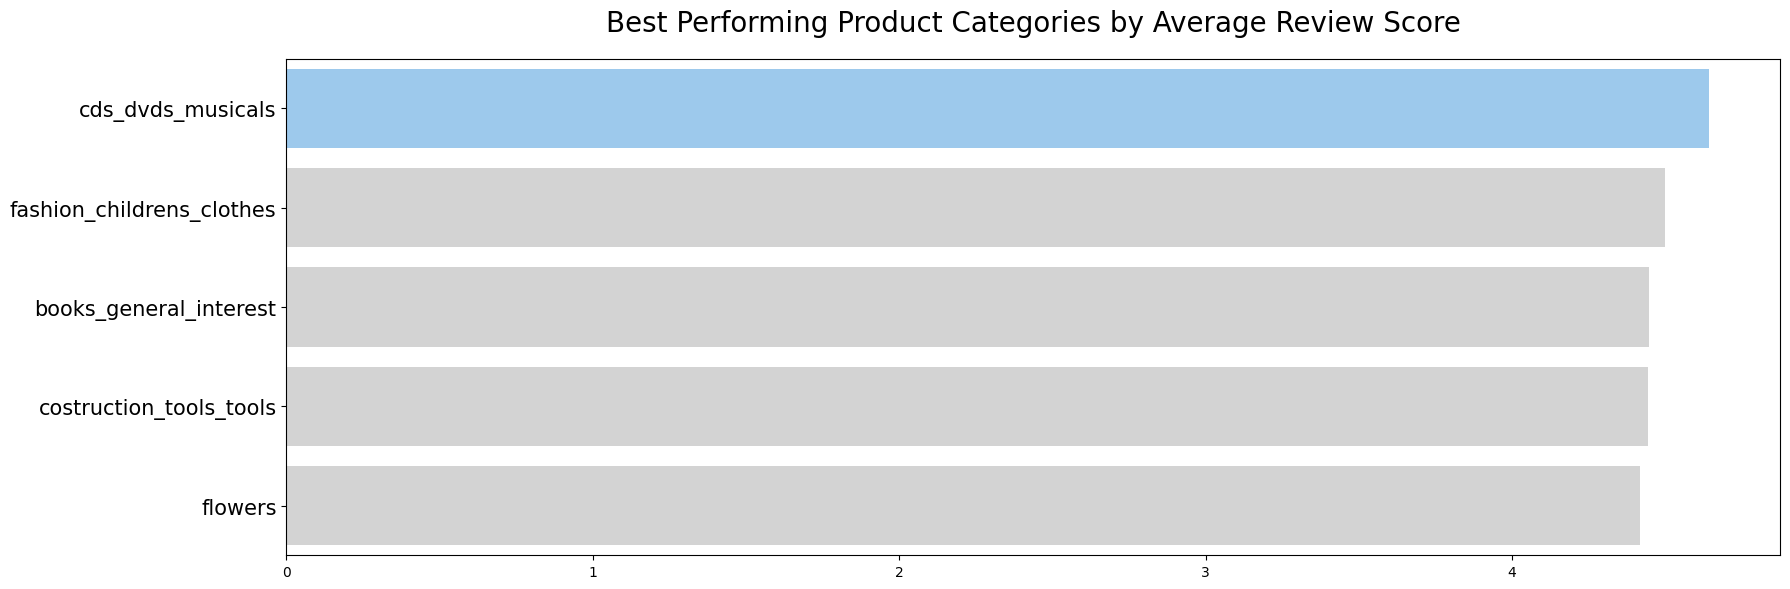

In [220]:
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(18, 6))
sns.barplot(x="mean_review_score", y="product_category", data=mean_review_score_df.head(5), palette=colors)
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize=15)
plt.xticks(fontsize=10)
plt.title("Best Performing Product Categories by Average Review Score", loc="center", fontsize=20, pad=20)
plt.tight_layout()
# plt.savefig("images/best-performing-2.png")
plt.show()

Berdasarkan visualisasi data di atas, dapat disimpulkan bahwa **cds_dvds_musicals** merupakan product categories yang memeiliki rating terbaik.

C:\Users\ACER\AppData\Local\Temp\ipykernel_6796\4241243956.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="mean_review_score", y="product_category", data=mean_review_score_df.sort_values(by="mean_review_score", ascending=True).head(5), palette=colors)


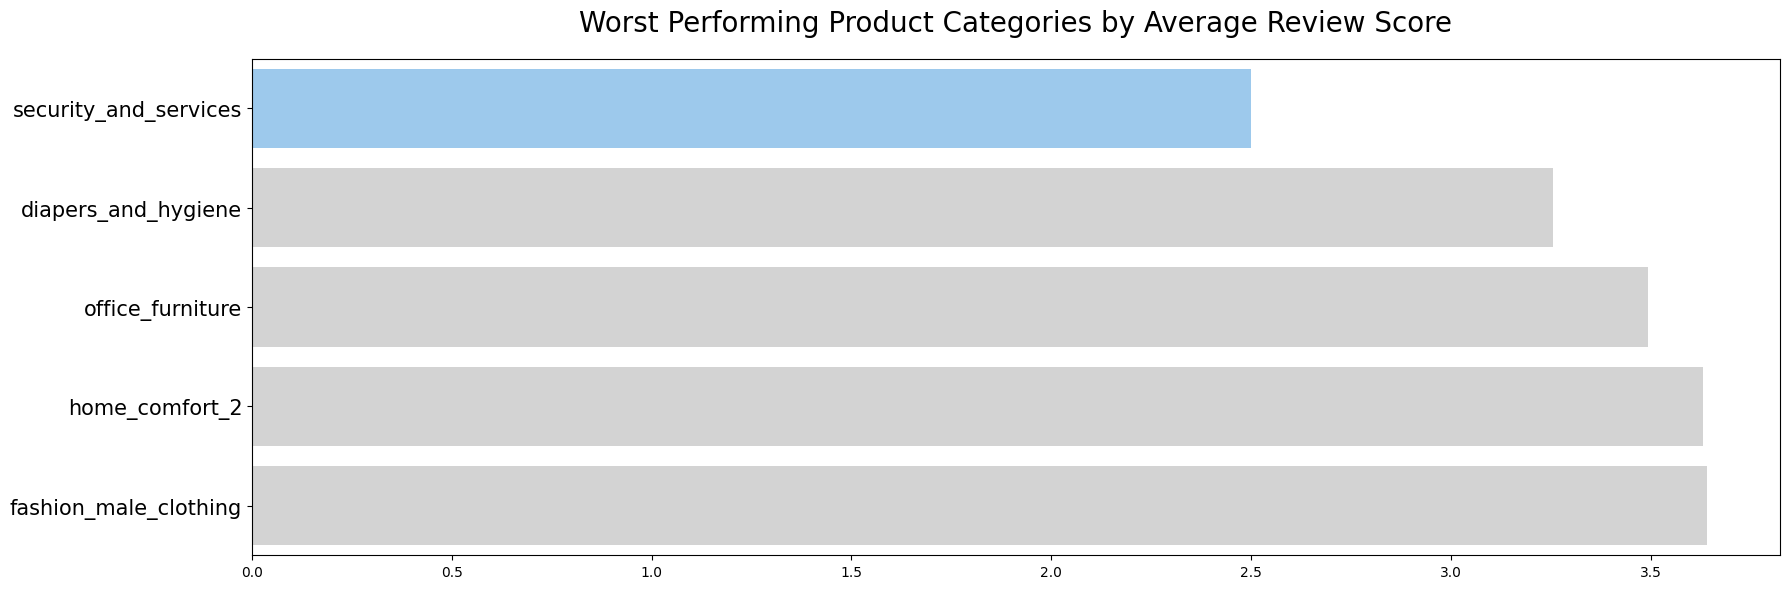

In [221]:
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(18, 6))
sns.barplot(x="mean_review_score", y="product_category", data=mean_review_score_df.sort_values(by="mean_review_score", ascending=True).head(5), palette=colors)
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize=15)
plt.xticks(fontsize=10)
plt.title("Worst Performing Product Categories by Average Review Score", loc="center", fontsize=20, pad=20)
plt.tight_layout()
# plt.savefig("images/worst-performing-2.png")
plt.show()

Berdasarkan visualisasi data di atas, dapat disimpulkan bahwa **security_and_services** merupakan product categories yang memeiliki rating terburuk dan hal ini berakibat terhadap jumlah penjualannya.

### Pertanyaan 2: Bagaimana performa penjualan dan revenue perusahaan?

In [222]:
orders_df = orders_df[(orders_df["order_status"] == "delivered")].reset_index(drop=True)

In [223]:
orders_df = orders_df.merge(order_payments_df, on="order_id")

In [224]:
monthly_orders_df = orders_df.resample('M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.sort_values(by="order_purchase_timestamp")
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

monthly_orders_df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_6796\3573400689.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = orders_df.resample('M', on='order_purchase_timestamp').agg({


,order_purchase_timestamp,order_count,revenue
0,2016-10,265,46566.71
1,2016-11,0,0.00
2,2016-12,1,19.62
3,2017-01,750,127545.67
4,2017-02,1653,271298.65


In [225]:
monthly_orders_df.to_csv("dashboard/monthly_orders.csv", index=False)

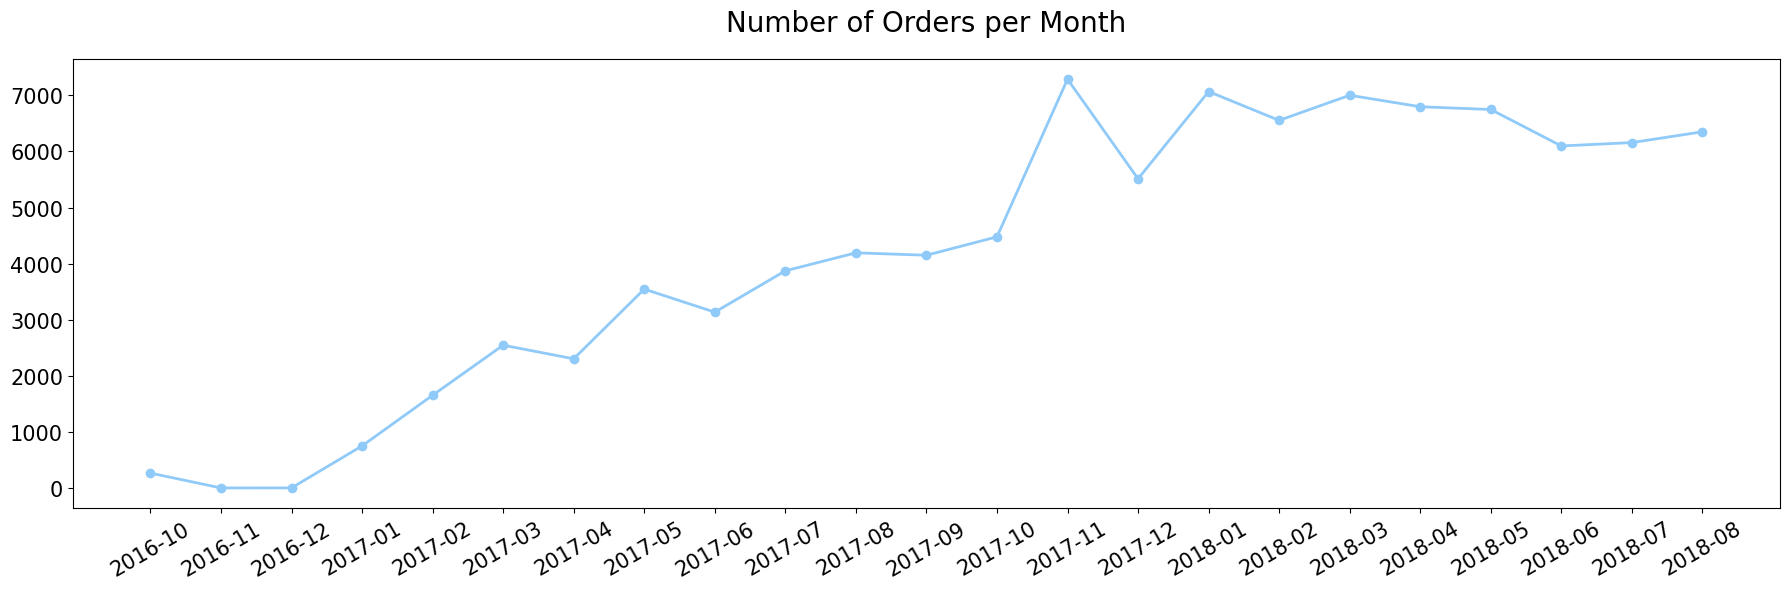

In [226]:
plt.figure(figsize=(18, 6))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["order_count"],
    marker='o', 
    linewidth=2,
    color="#90CAF9"
)
plt.title("Number of Orders per Month", loc="center", fontsize=20, pad=20)
labels, locations = plt.yticks()
plt.xticks(rotation=30,fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
# plt.savefig("images/orders-per-month.png")
plt.show()

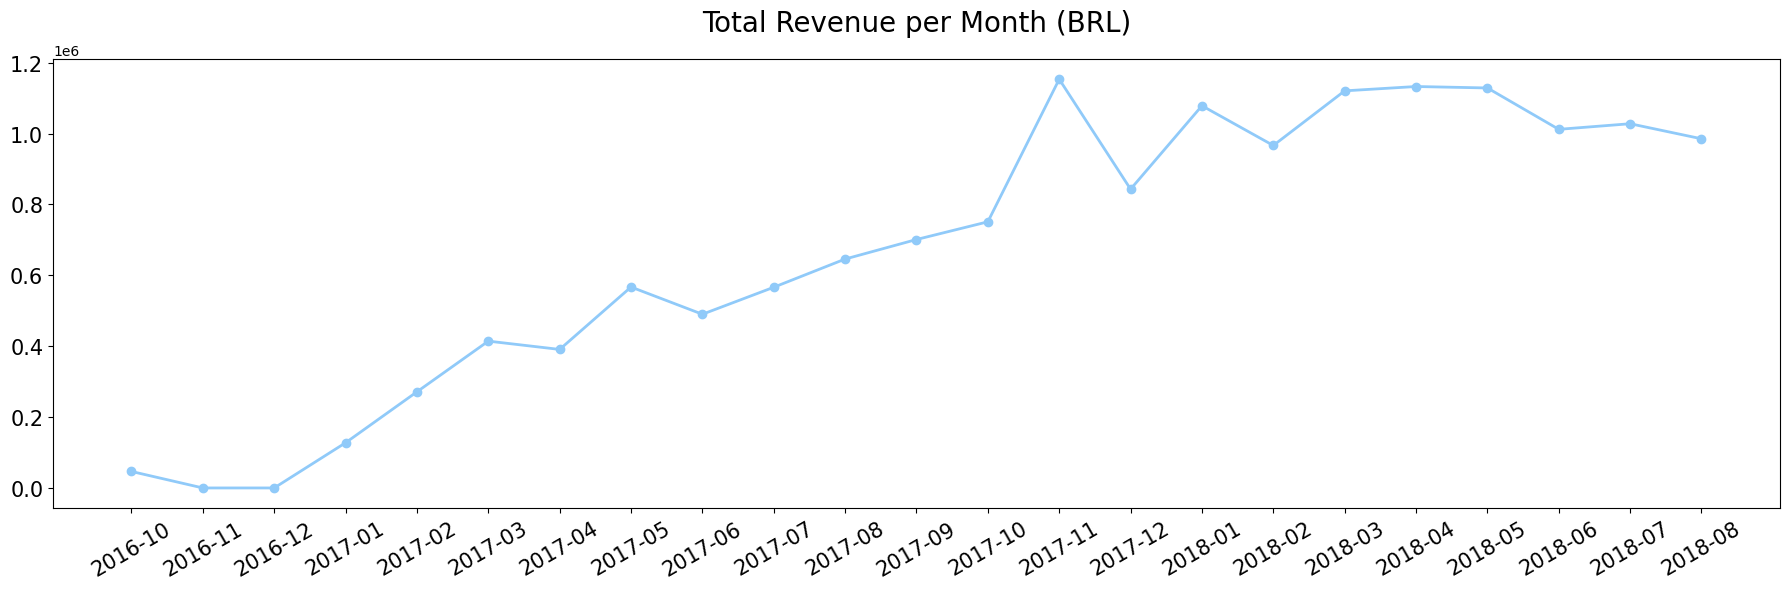

In [227]:
plt.figure(figsize=(18, 6))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["revenue"],
    marker='o', 
    linewidth=2,
    color="#90CAF9"
)
plt.title("Total Revenue per Month (BRL)", loc="center", fontsize=20, pad=20)
labels, locations = plt.yticks()
plt.xticks(rotation=30,fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
# plt.savefig("images/revenue-per-month.png")
plt.show()

Dari kedua grafik di atas, dapat disimpulkan bahwa performa penjualan dan revenue perushaan cenderung meningkat setiap bulannya.

### Pertanyaan 3: Kota manakah yang menyumbang revenue terbanyak?

In [228]:
new_orders_df = pd.merge(
    left=orders_df,
    right=customers_df,
    on="customer_id"
)
new_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [229]:
highest_orders_city_df = new_orders_df.groupby("customer_city").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(ascending=False, by="payment_value").reset_index()
highest_orders_city_df.columns = ["customer_city", "order_count", "revenue"]
highest_orders_city_df.head()

,customer_city,order_count,revenue
0,sao paulo,15045,2108162.22
1,rio de janeiro,6601,1111872.32
2,belo horizonte,2697,406050.87
3,brasilia,2071,345221.87
4,curitiba,1489,238582.26


In [230]:
highest_orders_city_df.to_csv("dashboard/highest_orders_city.csv", index=False)

C:\Users\ACER\AppData\Local\Temp\ipykernel_6796\1307160184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="revenue", y="customer_city", data=highest_orders_city_df.head(), palette=colors)


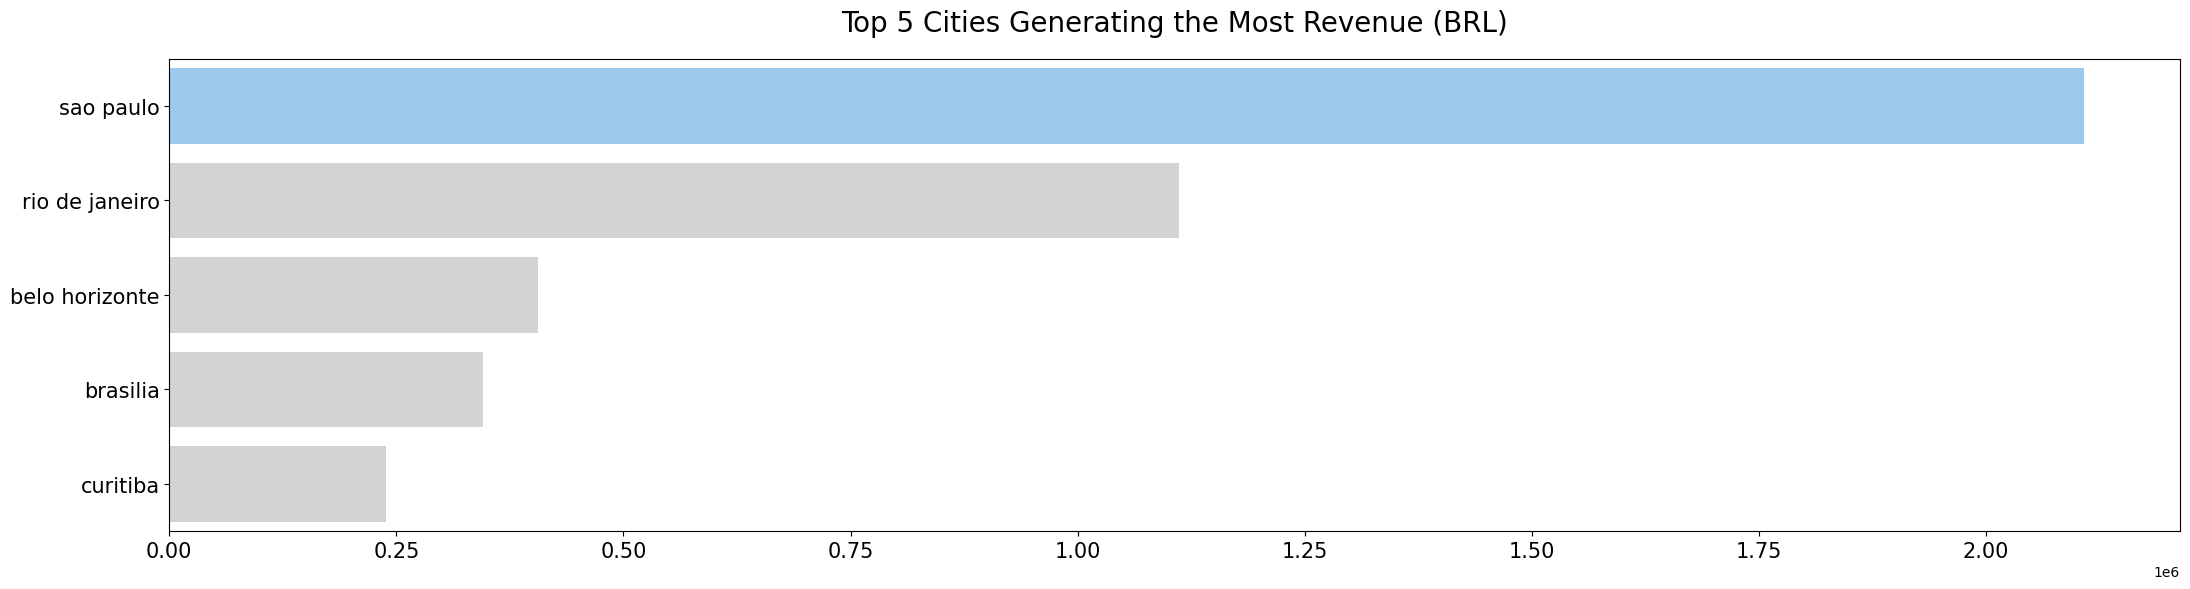

In [231]:
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(22, 6))
sns.barplot(x="revenue", y="customer_city", data=highest_orders_city_df.head(), palette=colors)
plt.xticks(fontsize=15)
plt.title("Top 5 Cities Generating the Most Revenue (BRL)", loc="center", fontsize=20, pad=20)
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.tight_layout()
# plt.savefig("images/top-cities.png")
plt.show()

Dari grafik tersebut dapat disimpulkan bahwa **sao paulo** merupakan kota yang paling banyak menyumbang revenue ke perushaan. Hal ini tentunya mengindikasi bahwa banyak high value customer yang tedapat di kota tersebut.

### Pertanyaan 4: Bagaimana segmentasi pelanggan dinilai dari RFM score?

* **Recency:** How recently has the customer made a transaction?
* **Frequency:** How often do customers order?
* **Monetary:** How much money have customers spent on products on this website/app?

In [232]:
rfm_df = new_orders_df.groupby("customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "payment_value": "sum"
})
rfm_df.columns = ["customer_unique_id", "max_order_purchase_timestamp", "frequency", "monetary"]
rfm_df["max_order_purchase_timestamp"] = rfm_df["max_order_purchase_timestamp"].dt.date
rfm_df.head()

,customer_unique_id,max_order_purchase_timestamp,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,196.89


In [233]:
recent_date = new_orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_purchase_timestamp"].apply(lambda x: (recent_date-x).days)
rfm_df.drop("max_order_purchase_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,114
2,0000f46a3911fa3c0805444483337064,1,86.22,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,321
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,288


In [234]:
rfm_df.describe()

,frequency,monetary,recency
count,93357.000000,93357.000000,93357.000000
mean,1.033420,165.198772,237.473783
std,0.209099,226.314579,152.587935
min,1.000000,9.590000,0.000000
25%,1.000000,63.060000,114.000000
50%,1.000000,107.780000,218.000000
75%,1.000000,182.560000,346.000000
max,15.000000,13664.080000,695.000000


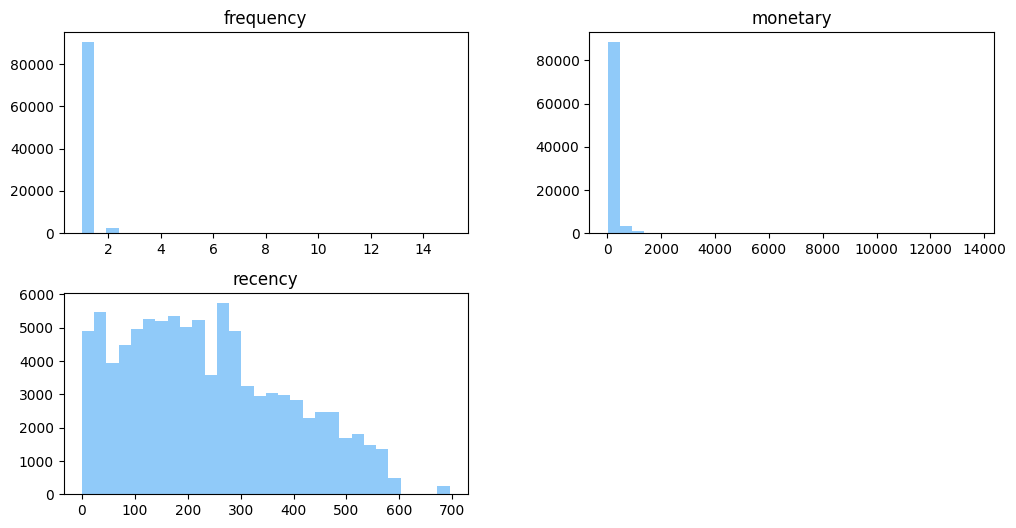

In [235]:
rfm_df.hist(bins=30, color="#90CAF9", figsize=(12, 6), grid=False)
# plt.savefig("images/RFM-distribution.png")
plt.show()

Dari grafik di atas dapat dilihat bahwa sangat sedikit jumlah customer yang melakukan transaksi lebih dari 1 kali.

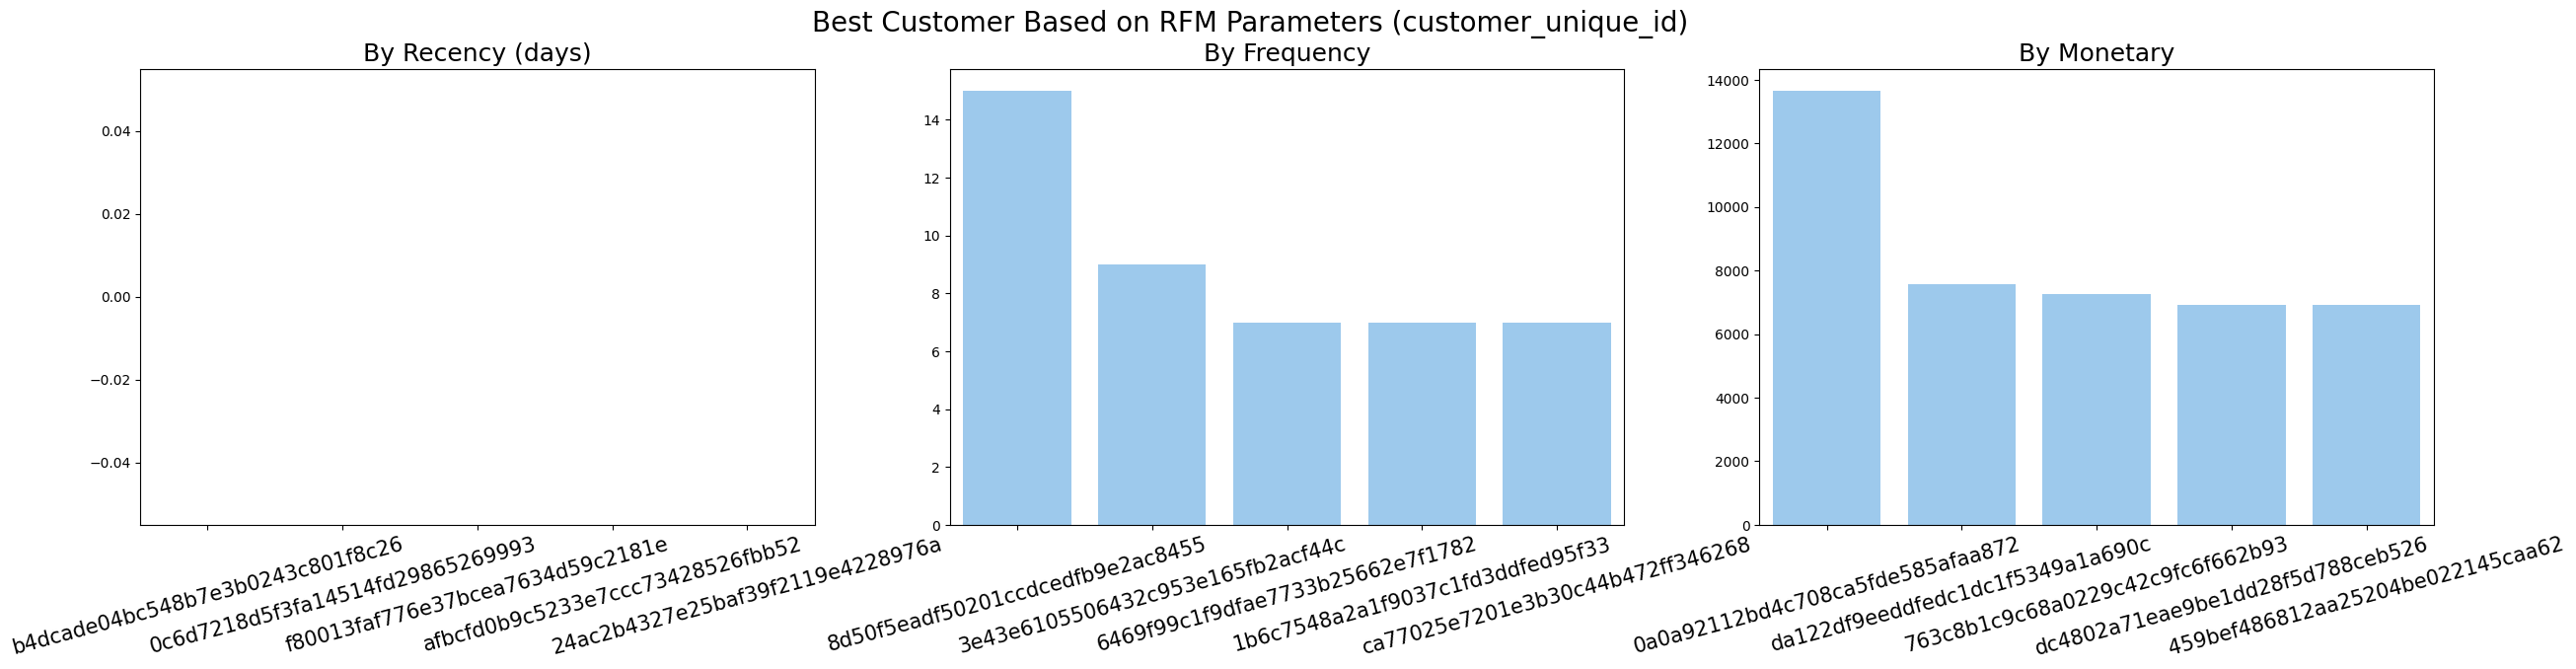

In [236]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), color="#90CAF9", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15, rotation=15)

sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), color="#90CAF9", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=15)

sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), color="#90CAF9", ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20)
# plt.savefig("images/top-customer.png")
plt.show()

##### Calculate RFM Score

In [237]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_unique_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,111,70946.0,45278.5,59241.5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,114,69984.5,45278.5,2027.5
2,0000f46a3911fa3c0805444483337064,1,86.22,537,3235.0,45278.5,36827.5
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,321,26666.5,45278.5,11436.5
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,288,31348.0,45278.5,72814.5


In [238]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_unique_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,111,75.998372,48.50038,63.456945
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,114,74.968399,48.50038,2.171771
2,0000f46a3911fa3c0805444483337064,1,86.22,537,3.465378,48.50038,39.448033
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,321,28.565537,48.50038,12.250287
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,288,33.580427,48.50038,77.995758


In [239]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)

rfm_df[['customer_unique_id', 'RFM_score']].head()

,customer_unique_id,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,3.06
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.30
2,0000f46a3911fa3c0805444483337064,1.83
3,0000f6ccb0745a6a4b88665a16c9f078,1.24
4,0004aac84e0df4da2b147fca70cf8255,3.15


#### Customer segmentation based on RFM_score

In [240]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_unique_id', 'RFM_score', 'customer_segment']].head(20)

,customer_unique_id,RFM_score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,3.06,Medium value customer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.30,lost customers
2,0000f46a3911fa3c0805444483337064,1.83,Low value customers
3,0000f6ccb0745a6a4b88665a16c9f078,1.24,lost customers
4,0004aac84e0df4da2b147fca70cf8255,3.15,Medium value customer
5,0004bd2a26a76fe21f786e4fbd80607f,3.21,Medium value customer
6,00050ab1314c0e55a6ca13cf7181fecf,1.40,lost customers
7,00053a61a98854899e70ed204dd4bafe,3.80,Medium value customer
8,0005e1862207bf6ccc02e4228effd9a0,2.59,Low value customers
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2.82,Low value customers


In [241]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_unique_id.nunique()
customer_segment_df.columns = ["customer_segment", "customer_count"]
customer_segment_df

,customer_segment,customer_count
0,High value customer,2620
1,Low value customers,44970
2,Medium value customer,27219
3,Top customers,511
4,lost customers,18037


In [242]:
customer_segment_df.to_csv("dashboard/customer_segment.csv", index=False)

In [243]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

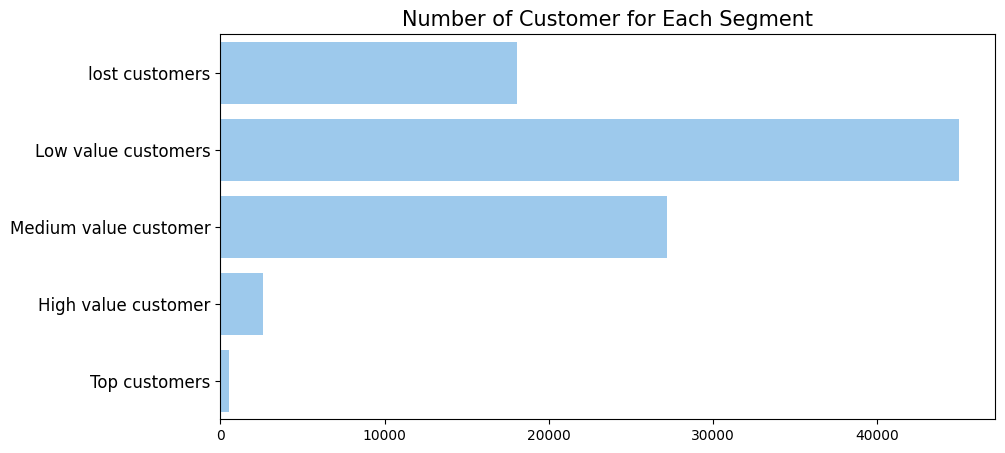

In [244]:
plt.figure(figsize=(10, 5))
colors_ = ["#90CAF9", "#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_count", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    color="#90CAF9"
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
# plt.savefig("images/customer-segmentation.png")
plt.show()

Dari visualisasi di atas dapat disimpulkan bahwa customer yang kita miliki di dominasi oleh **low value customers** yang memiliki jumlah transaksi yang kecil. Tugas kita selanjutnya adalah mengonversi **low value customers** ini menjadi medium atau hight value customers. Hal ini bisa dilakukan dengan mengguankan segmented promo atau promo yang menargetkan khusus segmentasi **low value customers**.

## Conclusion

- **Bed bath table** merupakan kategori produk dengan jumlah order terbanyak sedangkan **security and services** merupakan product categories yang paling sedikit diorder. **Cds dvds musicals** merupakan product categories yang memeiliki rating terbaik sedangkan **security and services** merupakan product categories yang memeiliki rating terburuk dan hal ini berakibat terhadap jumlah penjualannya.
- Performa penjualan dan revenue perushaan cenderung meningkat setiap bulannya.
- **Sao paulo** merupakan kota yang paling banyak menyumbang revenue ke perushaan. Hal ini tentunya mengindikasi bahwa banyak high value customer yang tedapat di kota tersebut
- Customer yang kita miliki didominasi oleh **low value customers** yang memiliki jumlah transaksi yang kecil. Tugas kita selanjutnya adalah mengonversi **low value customers** ini menjadi medium atau hight value customers. Hal ini bisa dilakukan dengan mengguankan segmented promo atau promo yang menargetkan khusus segmentasi **low value customers**.